<a href="https://colab.research.google.com/github/arshiaar/COMP4702-final/blob/main/Machine_Learning_Task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Complete classification and answer questions using the boston dataset. 

In [ ]:
# Import dataset and do preprocessing 


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  


Saving CPU_benchmark_v4(1).csv to CPU_benchmark_v4(1).csv
User uploaded file "CPU_benchmark_v4(1).csv" with length 299895 bytes


In [ ]:
import pandas as pd 

df = pd.read_csv("CPU_benchmark_v4(1).csv")

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cpuName      3825 non-null   object 
 1   price        1967 non-null   float64
 2   cpuMark      3825 non-null   int64  
 3   cpuValue     1967 non-null   float64
 4   threadMark   3825 non-null   int64  
 5   threadValue  1967 non-null   float64
 6   TDP          3140 non-null   float64
 7   powerPerf    3140 non-null   object 
 8   cores        3825 non-null   int64  
 9   testDate     3825 non-null   int64  
 10  socket       3825 non-null   object 
 11  category     3825 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 358.7+ KB
None
(3825, 12)


             total_missing  perc_missing
cpuName                  0      0.000000
price                 1858     48.575163
cpuMark                  0      0.000000
cpuValue              1858     48.575163
threadMark               0      0.000000
threadValue           1858     48.575163
TDP                    685     17.908497
powerPerf              685     17.908497
cores                    0      0.000000
testDate                 0      0.000000
socket                 788     20.601307
category               260      6.797386


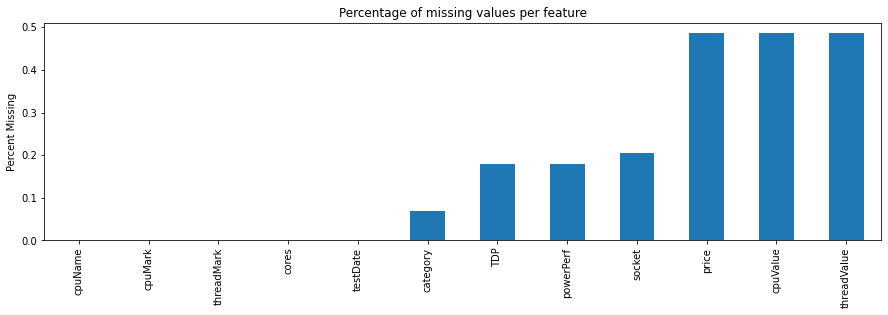

In [ ]:
# Missing Values 
import numpy as np 
df = df.replace('unknown', np.nan)
df = df.replace('Unknown', np.nan)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Percent Missing");

missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/df.shape[0])*100})
print(missing_data)

# Change Power perf to numbers lol
df['powerPerf'] = df['powerPerf'].astype(str).str.replace(',', '').astype(float)


In [ ]:
# Imputations 
# Use the three main categories of dataframe types and impute based on that. 

# Create a new column 
values = ['AMD', 'Intel','Qualcomm', 'Samsung']
conditions = list(map(df['cpuName'].str.contains, values))

df['CpuCats'] = np.select(conditions, values, 'other')

print(df.CpuCats.unique())
print(df['CpuCats'].value_counts(normalize=True) * 100)





['AMD' 'Intel' 'other' 'Qualcomm' 'Samsung']
Intel       56.601307
AMD         29.960784
other        9.934641
Qualcomm     2.928105
Samsung      0.575163
Name: CpuCats, dtype: float64


price           441.500946
cpuMark        5992.305882
cpuValue         35.354911
threadMark     1391.107451
threadValue      15.189009
TDP              62.375557
powerPerf       121.623239
cores             5.052288
testDate       2015.027974
dtype: float64
price           420.902531
cpuMark        5992.305882
cpuValue         33.665215
threadMark     1391.107451
threadValue      15.746026
TDP              59.067701
powerPerf       123.821825
cores             5.052288
testDate       2015.027974
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarnin

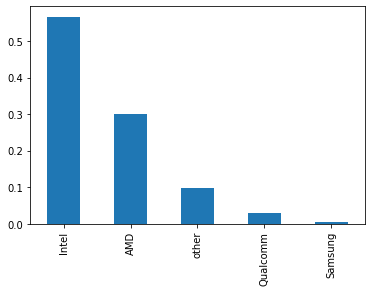

In [ ]:
# Impute missing values based on that. 
categories = []
for i in list(set(df['CpuCats'])):
    df_cat = df[df['CpuCats']== i]
    df_cat['price'].fillna(df_cat['price'].mean(),inplace = True)
    df_cat['cpuValue'].fillna(df_cat['cpuValue'].mean(),inplace = True)
    df_cat['TDP'].fillna(df_cat['TDP'].mean(),inplace = True)
    df_cat['threadValue'].fillna(df_cat['threadValue'].mean(),inplace = True)
    df_cat['powerPerf'].fillna(df_cat['powerPerf'].mean(),inplace = True)



    categories.append(df_cat)
    final_df = pd.concat(categories)

average2 = df.mean()
print(df.mean())
print(final_df.mean())
df['CpuCats'].value_counts(normalize=True).plot(kind=
                                        'bar')

             total_missing  perc_missing
cpuName                  0      0.000000
price                    0      0.000000
cpuMark                  0      0.000000
cpuValue                 0      0.000000
threadMark               0      0.000000
threadValue              0      0.000000
TDP                      0      0.000000
powerPerf                0      0.000000
cores                    0      0.000000
testDate                 0      0.000000
socket                 788     20.601307
category               260      6.797386
CpuCats                  0      0.000000


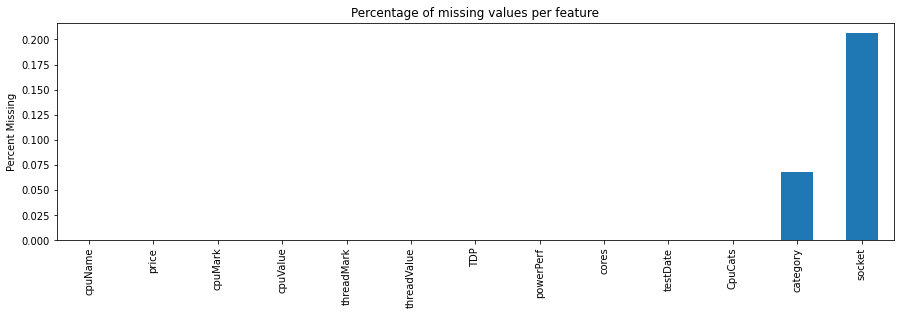

In [ ]:
# Missing Values plot after imputation
df = final_df 
df_cat = df 

df_cat['price'].fillna(df_cat['price'].mean(),inplace = True)
df_cat['cpuValue'].fillna(df_cat['cpuValue'].mean(),inplace = True)
df_cat['TDP'].fillna(df_cat['TDP'].mean(),inplace = True)
df_cat['threadValue'].fillna(df_cat['threadValue'].mean(),inplace = True)
df_cat['powerPerf'].fillna(df_cat['powerPerf'].mean(),inplace = True)
df_cat['socket'].fillna(df_cat['socket'].mode(),inplace = True)

df = df_cat 
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Percent Missing");

missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/df.shape[0])*100})
print(missing_data)

In [ ]:
# Changes to categorical data. 
# When can this be skipped? if they're neatly in little rows of 0-20 variables. 





# Changing category names to other names. 
# What about category names?
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['category']= label_encoder.fit_transform(df['category'].astype(str)) 


In [ ]:
# Density plot and correlation matrix 
# Only for continous variables 

# Copy of a dataframe and boom boom 
cont_df = df.copy()

# remove categorical variables. 
cont_df.drop(columns=['socket', 'category', 'cpuName', 'CpuCats'], inplace=True)


<bound method DataFrame.info of             price  cpuMark   cpuValue  threadMark  threadValue        TDP  \
0      397.973963   108822  38.646000        3330    19.963370  280.00000   
1     7299.990000    88338  12.100000        2635     0.360000  280.00000   
2      397.973963    86006  38.646000        2387    19.963370   65.17103   
3     7060.000000    85861  12.160000        2727     0.390000  225.00000   
4     6807.980000    83971  12.330000        2626     0.390000  280.00000   
...           ...      ...        ...         ...          ...        ...   
3819   458.483963       86  34.160921         254    13.373422   64.00000   
3820   458.483963       84  34.160921         225    13.373422   38.00000   
3821   458.483963       83  34.160921         180    13.373422   54.70000   
3822   458.483963       81  34.160921         223    13.373422   57.80000   
3824   458.483963       77  34.160921         203    13.373422   51.60000   

      powerPerf  cores  testDate  
0     38

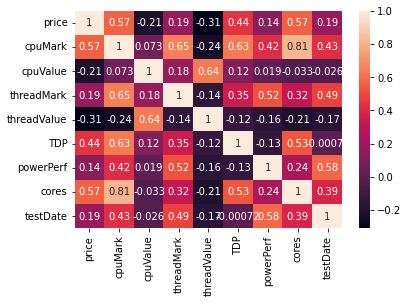

In [ ]:
# correlation matrix 
import seaborn as sns 

import matplotlib.pyplot as plt

# make sure all values are numeric. 
cont_df['powerPerf'] = cont_df['powerPerf'].astype(str).str.replace(',', '').astype(float)

print(cont_df.info)
#df['powerPerf'] = df['powerPerf'].astype(str).str.replace(',', '').astype(float)
cont_df = cont_df.apply(pd.to_numeric)



corrMatrix = cont_df.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

 

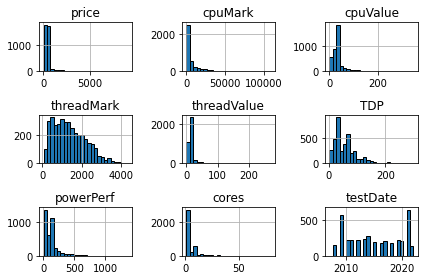

In [ ]:
# Density Plot
# Plots the histogram for each numerical feature in a separate subplot
cont_df.hist(bins=25,edgecolor="black")
plt.tight_layout();




In [ ]:
# Split the data into training and testing values. 

# split the dataframe into x and y here. 

# 
x = df[['price', 'cpuMark', 'cpuValue', 'threadMark', 'threadValue', 'TDP', 'powerPerf', 'cores']].to_numpy()
y = df[('category')].to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)



In [ ]:
from sklearn.preprocessing import StandardScaler

# standardise training and test sets on the same scale.
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)


In [ ]:

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# run standard PCA to get the scree graph 
pca = PCA()

Xpca_init = pca.fit_transform(x_train)



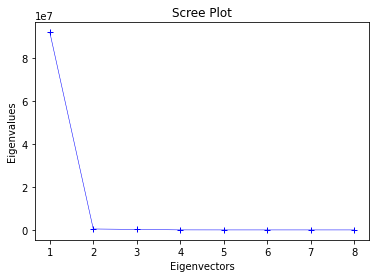

In [ ]:
# Scree Graph 

pc = np.arange(pca.n_components_)+1
plt.plot(pc, pca.explained_variance_, marker='+', linewidth=0.5, color='blue')
plt.title('Scree Plot')
plt.xlabel('Eigenvectors')
plt.ylabel('Eigenvalues')
plt.show()


In [ ]:
# accompanying code with the scree graph

# use pca. explained variance ratio to find what is equal to 80%
print(pca.explained_variance_ratio_*100)


[9.92577169e+01 4.75613013e-01 2.50124184e-01 1.48891889e-02
 8.66664715e-04 6.96860585e-04 8.25618012e-05 1.06017163e-05]


In [ ]:
# Run PCA using the chosen number of components 


pca = PCA(2)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)






In [ ]:
# Perform KDE 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
base_classifier = GaussianNB()
base_classifier.fit(x_train_pca, y_train)
cv_score = cross_val_score(base_classifier, x_train_pca, y_train, cv=10)
y_pred = base_classifier.predict(x_test_pca)
print(cv_score.mean())
print('%s classifer accuracy: %f' % ("Naive Bayes",accuracy_score(y_pred, y_test)*100))

# Remove highly correlated values
# Redo PCA 
# fit and 
train_df = pd.DataFrame(x_train, 
                        columns=['price', 'cpuMark', 'cpuValue', 'threadMark', 'threadValue', 'TDP', 'powerPerf', 'cores'])
x_sub = train_df[['price', 'cpuValue', 
                                 'threadMark', 'TDP', 'powerPerf', 'cores']].to_numpy()

test_df = pd.DataFrame(x_test, columns= ['price', 'cpuMark', 'cpuValue', 'threadMark', 'threadValue', 'TDP', 'powerPerf', 'cores'])
x_subt = test_df[['price', 'cpuValue', 
                                 'threadMark', 'TDP', 'powerPerf', 'cores']].to_numpy()


clf3 = GaussianNB()
clf3.fit(x_sub, y_train)

cv_score = cross_val_score(clf3, x_sub, y_train, cv=10)
print(cv_score.mean())
y_pred = clf3.predict(x_subt)


print('%s classifer accuracy: %f' % ("Naive Bayes after removing highly correlated values", 
                                     accuracy_score(y_pred, y_test)))

# choose a rough kernel to use, and then fix this. 
bandwidths = 10 ** np.linspace(1,2, 10)
score = 0 


clf4 = KDEClassifier(bandwidth=30, kernel='gaussian')
clf4.fit(x_sub,y_train)
cv_score = cross_val_score(clf4, x_sub, y_train, cv=10)
print(i, cv_score.mean())

print("gauss", score)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.36535947712418304
Naive Bayes classifer accuracy: 37.124183
0.6147058823529412
Naive Bayes after removing highly correlated values classifer accuracy: 0.615686
Samsung 0.65718954248366
gauss 0


In [ ]:
# Print the score


clf = KDEClassifier(bandwidth=30, kernel='gaussian')
clf.fit(x_sub,y_train)
print("now for test set accuracy")
y_pred = clf.predict(x_subt)
print(accuracy_score(y_pred, y_test))


now for test set accuracy
0.6483660130718955


[[160   0   0  45   0   0   4  23   4]
 [  1   0   0   3   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0]
 [ 23   0   0 176   0   0  12   3   2]
 [  0   0   0   5   0   0   0   0   1]
 [  1   0   0   2   0   0   0   0   0]
 [  2   0   0   3   0   0  69   0   3]
 [ 51   0   0  27   0   0   7  84   1]
 [  9   0   0  16   0   0  18   1   7]]


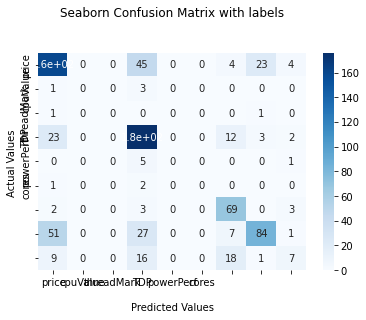

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['price', 'cpuValue', 
                                 'threadMark', 'TDP', 'powerPerf', 'cores'])
ax.yaxis.set_ticklabels(['price', 'cpuValue', 
                                 'threadMark', 'TDP', 'powerPerf', 'cores'])

## Display the visualization of the Confusion Matrix.
plt.show()

# This should be okay to figure out. 

In [ ]:

from sklearn.svm import SVC
 
svc = SVC()

kernels = ['linear', 'rbf']
c = np.linspace(1,100, 5)


grid = GridSearchCV(svc, param_grid={'kernel':kernels, 'C':c})
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.cv_results_['params'])
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['std_test_score'])

results = grid.cv_results_





/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


80
{'linear': [0.9019704433497537, 0.9086206896551726, 0.9017241379310346, 0.9017241379310346, 0.8945812807881774, 0.8874384236453203, 0.8874384236453203, 0.8945812807881774, 0.8945812807881774, 0.8945812807881774, 0.8945812807881774, 0.9014778325123153, 0.9014778325123153, 0.9014778325123153, 0.8874384236453203, 0.880295566502463, 0.8874384236453203, 0.9017241379310346, 0.9017241379310346, 0.9017241379310346], 'poly': [0.6059113300492611, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321, 0.6337438423645321], 'rbf': [0.6699507389162562, 0.7118226600985221, 0.7189655172413794, 0.7187192118226602, 0.7046798029556649, 0.7046798029556649, 0.7046798029556649, 0.7118226600985221, 0.71871

Text(0, 0.5, 'Mean CV Std Deviation')

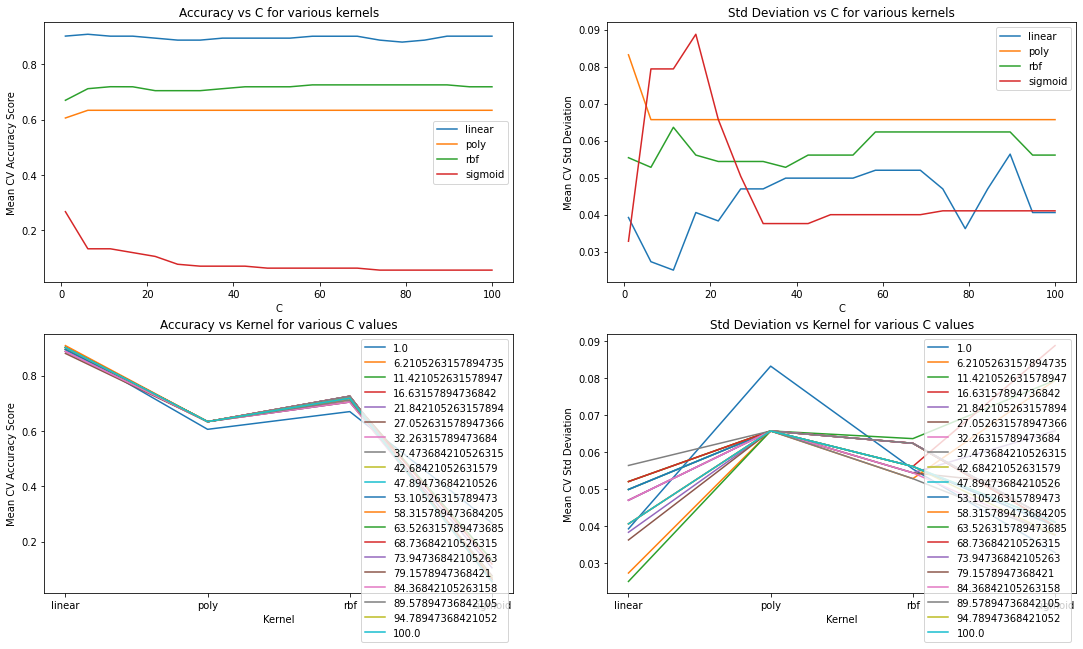

In [ ]:
# Using results. 

models = results['params']
acc_scores = results['mean_test_score']
std_scores = results['std_test_score']

print(len(models))

C_acc_results = {}
K_acc_results = {}

C_std_results = {}
K_std_results = {}

# Initialise dict values as lists. 
for k in kernels:
  C_acc_results[k] = []
  C_std_results[k] = []

for r in c:
  K_acc_results[r] = []
  K_std_results[r] = []

for m in range(0, len(models)):
  # get the kernel, C value 
  kernel_val = models[m].get('kernel')
  C_val = models[m].get('C')

  C_acc_results[kernel_val].append(acc_scores[m])
  C_std_results[kernel_val].append(std_scores[m])

  K_acc_results[C_val].append(acc_scores[m])
  K_std_results[C_val].append(std_scores[m])

print(C_acc_results)

# Plot the results 
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5)

for k in C_acc_results:
  axs[0,0].plot(c, C_acc_results[k], label=k)
  axs[0,1].plot(c, C_std_results[k], label=k)

axs[0,0].legend()
axs[0,0].set_title('Accuracy vs C for various kernels')
axs[0,0].set_xlabel("C")
axs[0,0].set_ylabel("Mean CV Accuracy Score")

axs[0,1].legend()
axs[0,1].set_title('Std Deviation vs C for various kernels')
axs[0,1].set_xlabel("C")
axs[0,1].set_ylabel("Mean CV Std Deviation")

for k in K_acc_results:
  axs[1,0].plot(kernels, K_acc_results[k], label=k)
  axs[1,1].plot(kernels, K_std_results[k], label=k)

axs[1,0].legend()
axs[1,0].set_title('Accuracy vs Kernel for various C values')
axs[1,0].set_xlabel("Kernel")
axs[1,0].set_ylabel("Mean CV Accuracy Score")

axs[1,1].legend()
axs[1,1].set_title('Std Deviation vs Kernel for various C values')
axs[1,1].set_xlabel("Kernel")
axs[1,1].set_ylabel("Mean CV Std Deviation")



In [ ]:

from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
# Fit the final classifier for SVM onhere. 
final_clf = SVC(kernel='linear', C=6.21)
final_clf.fit(x_train, y_train)

# get the test score on this one.
# get predictions for the test dataset.
y_pred = final_clf.predict(x_test)
print("Accuracy of Final SVM Classifier {:.0%}".format(accuracy_score(y_pred, y_test)))

# Run default SVM for comparison - this one should be without PCA. 
base_clf = SVC()
base_clf.fit(x_train_pca, y_train)

y_pred = final_clf.predict(x_test_pca)
print("Accuracy of Base SVM Classifier {:.0%}".format(accuracy_score(y_pred, y_test)))



In [ ]:


from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Keeping this in mind, fit the MLP

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
clf = MLPClassifier(activation='logistic', learning_rate_init=0.001, momentum=0.99)
cv_score = cross_val_score(clf, x_train, y_train, cv=10)
print(cv_score.mean())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy of Base MLP Classifier {:.0%}".format(accuracy_score(y_pred, y_test)))


# This is not a different PCA one - this is to debug for later.
clf = MLPClassifier(random_state=1000)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accuracy of Base MLP Classifier {:.0%}".format(accuracy_score(y_pred, y_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.6905228758169935
Accuracy of Base MLP Classifier 69%
Accuracy of Base MLP Classifier 59%


In [ ]:


# Using grid search and pipeline here.


mlp_classification =  [('CLF', MLPClassifier(random_state=0) )]
MLP_pipe = Pipeline(mlp_classification)

# PCA -> part of the pipeline, but number of components kept the same. 

activations = ['identity', 'logistic', 'relu']

for a in activations:
  clf = MLPClassifier(activation=a)
  cv_score = cross_val_score(clf, x_train, y_train, cv=10)
  print(a, cv_score.mean())

learning_rates = np.linspace(0.0001, 0.001, 5)
for l in learning_rates:
  clf = MLPClassifier(learning_rate_init=l, activation='logistic', max_iter =1000)
  cv_score = cross_val_score(clf, x_train, y_train, cv=10)
  print(l, cv_score.mean())


#momentum = np.linspace(0.7, 0.99, 5)


#search = GridSearchCV(MLP_pipe, param_grid, cv=10)

#search.fit(x_train, y_train)
#print("Best parameter (CV score=%0.3f):" % search.best_score_)
#print(search.best_params_)

# the convergence warnings are so frustrating - get rid of the learning rates?

# logistic. 
# learning rate starts at 0.53. 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


identity 0.48039215686274506


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


logistic 0.692156862745098


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


relu 0.531045751633987


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.0001 0.7163398692810458


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.000325 0.6660130718954248


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


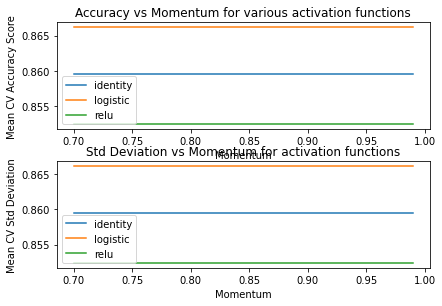

In [ ]:
# plot momentum vs function - can be solver or activation 
# change the key word here.
# use different keywords, otherwise always numerical vs the other value
# two sets of plots. 

results = search.cv_results_
models = results['params']
acc_scores = results['mean_test_score']
std_scores = results['std_test_score']
momentum = np.linspace(0.7, 0.99, 10)


def plot(models, acc_scores, std_scores, y_params, y_name, x_params):
  paramx_acc_results = {}
  paramx_std_results = {}

  for y in y_params:
    paramx_acc_results[y] = []
    paramx_std_results[y] = []

  for m in range(0, len(models)):
    y_val = models[m].get(y_name)

    paramx_acc_results[y_val].append(acc_scores[m])
    paramx_std_results[y_val].append(acc_scores[m])


  fig, axs = plt.subplots(2,1)
  fig.tight_layout()

  for k in paramx_acc_results:
    axs[0].plot(x_params, paramx_acc_results[k], label=k)
    axs[1].plot(x_params, paramx_std_results[k], label=k)


  axs[0].legend()
  axs[0].set_title('Accuracy vs Momentum for various activation functions')
  axs[0].set_xlabel("Momentum")
  axs[0].set_ylabel("Mean CV Accuracy Score")

  axs[1].legend()
  axs[1].set_title('Std Deviation vs Momentum for activation functions')
  axs[1].set_xlabel("Momentum")
  axs[1].set_ylabel("Mean CV Std Deviation")






plot(models, acc_scores, std_scores, activations, 'CLF__activation', momentum)


In [ ]:
# final result of MLP. 

clf = MLPClassifier(max_iter=1000, momentum=0.7, activation='logistic')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accuracy of Final MLP Classifier {:.0%}".format(accuracy_score(y_pred, y_test)))

# Massive difference between PCA. 



Accuracy of Final MLP Classifier 39%
